# Breast_Cancer
Southern University of Science and Technology, Department of Computer Science and Engineering
11510365 Xue Yiheng
## Introduction
Features are computed from a digitized image of a fine needle aspirate(FNA) of a brase mass. They describe characteristics of the cell nuclei present in the image. In the 3-dimensional space is that described in: \[K. p. Bennett and O. L. Managasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization methods and Software 1, 1992, 23-34\].

## Import data
Load the data as follow

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

breast_cancer_data = pd.read_csv('/Users/xueyiheng/Desktop/Intelligent_Data_Analysis/dataset/breast_cancer_data.csv')
breast_cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


As for each row about the breast cancer patients, the diagnosis is 'M' or 'B' (which means 'malignant' or 'benign') is the most important thing. Therefore we count that how many people have malignant and benign tumors.

Number of Benign	:	  357
Number of Malignant	:	  212
Percentage Benign	:	  62.74 %
Percentage Malignant	:	  37.26 %


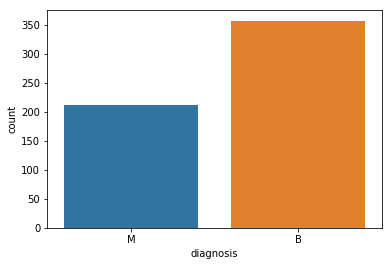

In [2]:
sns.countplot(x = 'diagnosis', data = breast_cancer_data)
B, M = breast_cancer_data['diagnosis'].value_counts()

print('Number of Benign\t:\t ',B)
print('Number of Malignant\t:\t ',M)
print('Percentage Benign\t:\t % 2.2f %%' % (B/(B+M)*100))
print('Percentage Malignant\t:\t % 2.2f %%' % (M/(B+M)*100))

In [3]:
breast_cancer_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


And the describe of each index:
            id: ID number
            diagnosis: The diagnosis of breast tissues(M=malignant, B=benign)
            radius_mean: mean of distances from center to points on the perimeter
            texture_mean: standard deviation of gray-scale values
            perimeter_mean: mean size of the core tumor
            area_mean
            smoothness_mean: mean of local variation in radius lengths
            compactness_mean: mean of $$\frac{perimeter^2}{area}- 1.0$$
            concavity_mean: mean of severity of concave portions of the contour
            concave points_mean: mean for number of concave portions of the contour
            symmetry_mean
            fractal_dimension_mean: mean for "coastline approximation" - 1
            radius_se: standard error for the mean of distances from center to points on the perimeter
            texture_se: standard error for standard deviation of gray-scale values
            perimeter_se
            area_se
            smoothness_se: standard error for local variation in radius lengths
            compactness_se: standard error for $$\frac{perimeter^2}{area}- 1.0$$
            concavity_se: standard error for severisy of concave portions of the contour
            concave points_se: standard error for number of concave portions of the contour
            symmetry_se
            fractal_dimension_se: standard error for "coastline approximation" - 1
            radius_worst: "worst" or largest mean value for mean of distances from center to points on the perimeter
            texture_worst "worst" or largest mean value for standard deviation of gray-scale values
            perimeter_worst
            area_worst
            smoothness_worst: "worst" or largest mean value for local variation in radius lengths
            compactness_worst: "worst" or largest mean value for $$\frac{perimeter^2}{area}- 1.0$$
            concavity_worst: "worst" or largest mean value for severity of concave portions of the contour
            concave points_worst: "worst" of largest mean value for number of concave portions of the contour
            symmetry_worst
            fractal_dimension_worst: "worst" or largest mean value for "coastline approximation" - 1
            
We do the pre-analysis of the dataset, we can easily get the points that 'diagnosis' is only one column that is not numeric format, and 'M' means malignant, 'B' means benign. Besides this point, 'id' is needless in my work. Therefore, I need to drop it.

In [4]:
# Drop function is used to delete the row, we need to add 'axis = 1' when we want to delete the column.
data = breast_cancer_data.drop(['id', 'diagnosis', 'Unnamed: 32'], axis = 1).astype(np.float) # We drop the 3 columns and trans the dataframe to the float type.
target = breast_cancer_data['diagnosis']
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


We can easily know that there are 30 columns we will use in the next steps.

In [6]:
list(data.columns)

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

And we get a matrix type named 'data_test', maybe we will use later.

In [7]:
data_test = np.mat(data)
data_test

matrix([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]])

## Data standardisation

In [36]:
data_2 = data.values
target_2 = target.apply(lambda x: 0 if x=='B' else 1).values
print(data_2)
print(data_2.shape)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
(569, 30)


In [38]:
target_2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [9]:
from sklearn.preprocessing import StandardScaler
data_std = StandardScaler().fit_transform(data_2)
print("The shape of 'data_std' is ", data_std.shape)
print("The type of 'data_std' is ", data_std.dtype)

The shape of 'data_std' is  (569, 30)
The type of 'data_std' is  float64


In [40]:
data_std

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

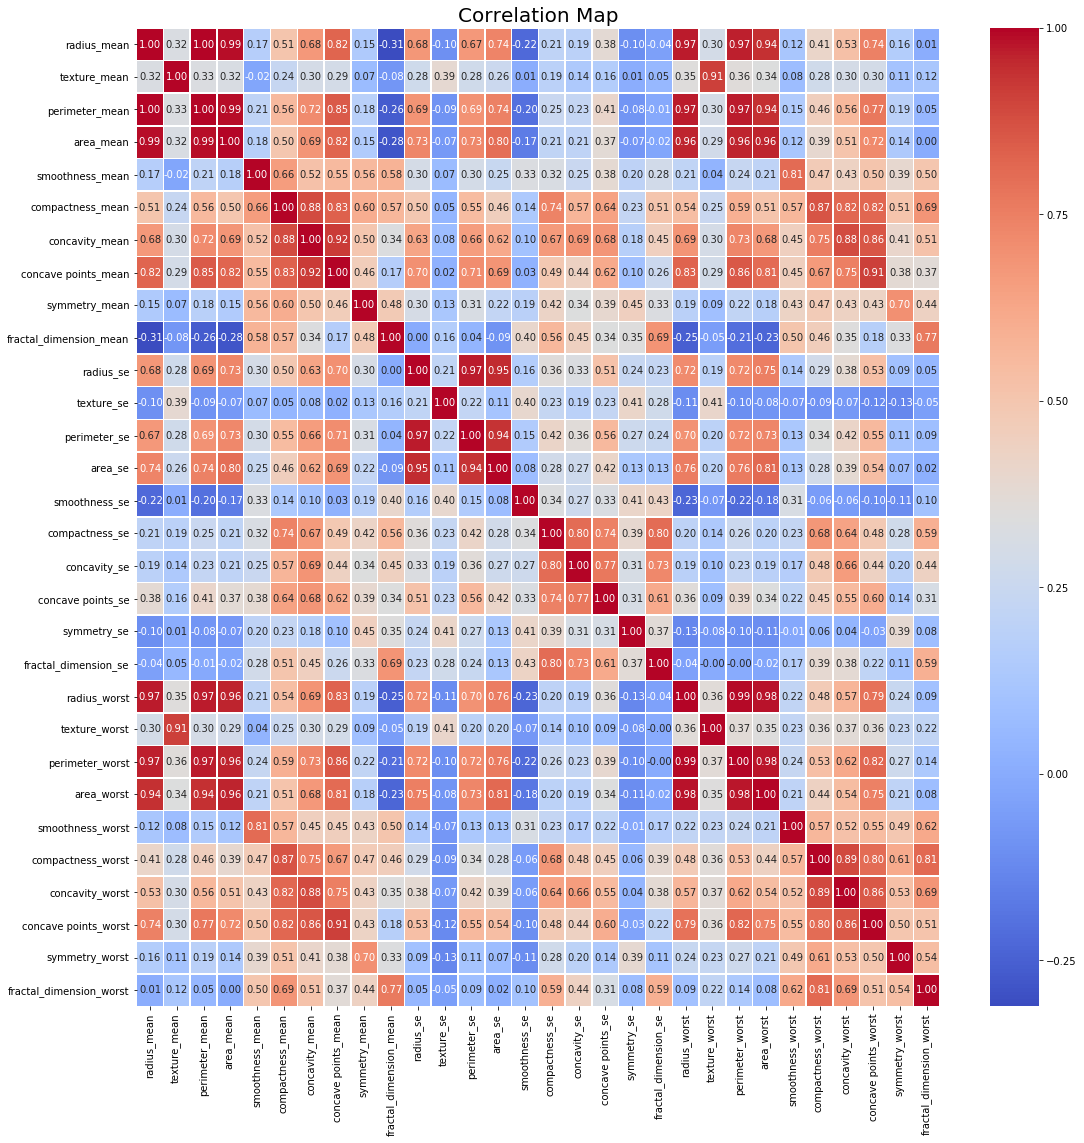

In [11]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".2f",ax=ax,cmap= 'coolwarm')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map', size=20)
plt.show()

We want to know the relationship between each two columns, therefore we get this 'heatmap'. The range of the number in the matrix is between \[-1, 1\]. The lightest '1.0' means that two variable are positively correlated with each other, and '-1.0' means negatively correalted with each other.

And we find that there are 3 different types, '_mean', '_se', '_worst', and we need to analysis them in 3 diagrams.

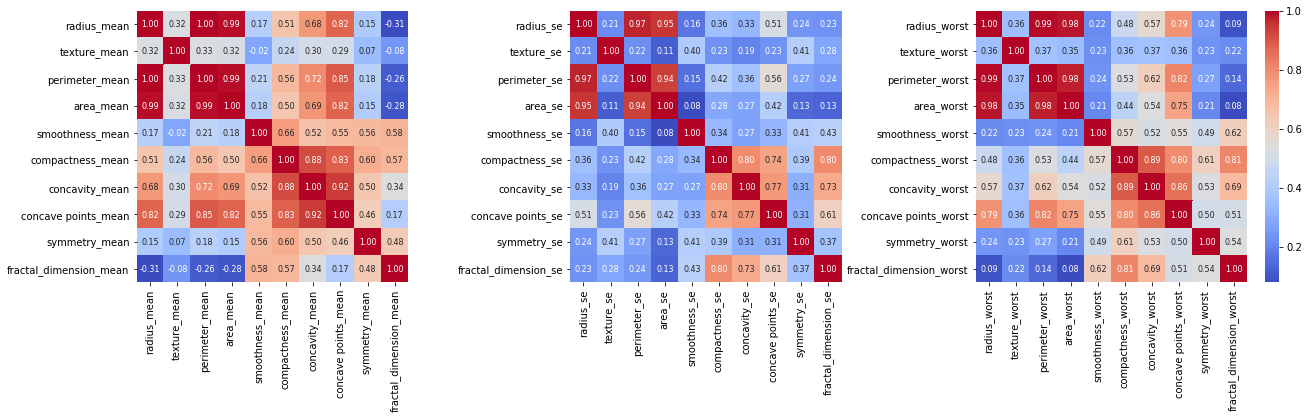

In [12]:
plt.figure(figsize=(22,5))
plt.subplot(1, 3, 1)
sns.heatmap(data[data.columns[0:10]].corr(), cbar = False,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},cmap= 'coolwarm')
plt.subplot(1, 3, 2)
sns.heatmap(data[data.columns[10:20]].corr(), cbar = False,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},cmap= 'coolwarm')
plt.subplot(1, 3, 3)
sns.heatmap(data[data.columns[20:30]].corr(), cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},cmap= 'coolwarm')

# Principal Component Analysis

Principal Component Analysis(PCA) is a dimension-reduction tool that can be used to reduce a large set of variables to a small set that still contains most of the information in the large set. The 'Breast_Cancer' dataset is more than 30 columns and near 600 rows, it is very suitable to use the PCA function to deal with it. Principal component analysis is a mathematical procedure that transforms a number of correlated variabled into a smaller number of uncorrelated variabled called principal components.
PCA seeks a linear combination of variables such that the maximum variance is extracted from the variables and then removes this variance and seeks a second linear combination which explains the maximum proportion of the remaining variance, and so on. This is called the principal axis method and results in orthogonal factors.

In [33]:
def meanX(dataX):
    return np.mean(dataX, axis = 0) # 'axis = 0' means get the data from the row, and then 'axis = 1' means from the column

def pca(XMat, k):
    average = meanX(XMat)
    m, n = np.shape(XMat)
    data_adjust = []
    avgs = np.tile(average, (m, 1))
    data_adjust = XMat - avgs
    covX = np.cov(data_adjust.T) # Calculate the convariance matrix
    featValue, featVec = np.linalg.eig(covX) # Calculate the eigenvector and eigenvalue of the convariance matrix
    index = np.argsort(-featValue) # Sort from big to small
    finalData = []
    '''
    if k > n:
        print ("k must lower than feature number")
        return
    else:
    '''
    selectVec = np.matrix(featVec.T[index[:k]])
    finalData = data_adjust * selectVec.T
    reconData = (finalData * selectVec) + average
    
    plt.figure(figsize = (16, 11))
    plt.plot(featValue/1000000, 'k', linewidth=2)
    plt.xlabel('n_components')
    plt.ylabel('explained_variance')
    plt.title('Eigenvalue spectrum[data_std]', size=20)
    plt.show()
    
    return finalData, reconData, index

def plotBestFit(data1, data2):    
    dataArr1 = np.array(data1)
    dataArr2 = np.array(data2)
 
    m = np.shape(dataArr1)[0]
    axis_x1 = []
    axis_y1 = []
    axis_x2 = []
    axis_y2 = []
    for i in range(m):
        axis_x1.append(dataArr1[i,0])
        axis_y1.append(dataArr1[i,1])
        axis_x2.append(dataArr2[i,0]) 
        axis_y2.append(dataArr2[i,1])                 
    fig = plt.figure(figsize=(16, 11))
    ax = fig.add_subplot(111)
    ax.scatter(axis_x1, axis_y1, s=20, c='red', marker='.')
    ax.scatter(axis_x2, axis_y2, s=5, c='blue', marker='.')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('2-D PCA projections[data_std]', size=20)
    #plt.savefig("outfile.png")
    plt.show() 
    #XMat = np.array(data)
    #XMat = np.loadtxt(open("/Users/xueyiheng/Desktop/Intelligent_Data_Analysis/dataset/breast_cancer_data.csv","rb"),delimiter=",",skiprows=0) 

In [39]:
def main():
    #datafile = "/Users/xueyiheng/Desktop/Intelligent_Data_Analysis/dataset/breast_cancer_data.txt"
    #XMat = loaddat(datafile)
    XMat = np.array(data_std)
    k = 2
    return pca(XMat, k)
if __name__=="__main__":
    finalData, reconMat, index = main()
    plotBestFit(finalData, reconMat)
    #print (index)

ValueError: not enough values to unpack (expected 2, got 1)

And we compare our results with the sklearn-decomposition PCA package. Some details are different between them, but the whole diagram is in the same trends.

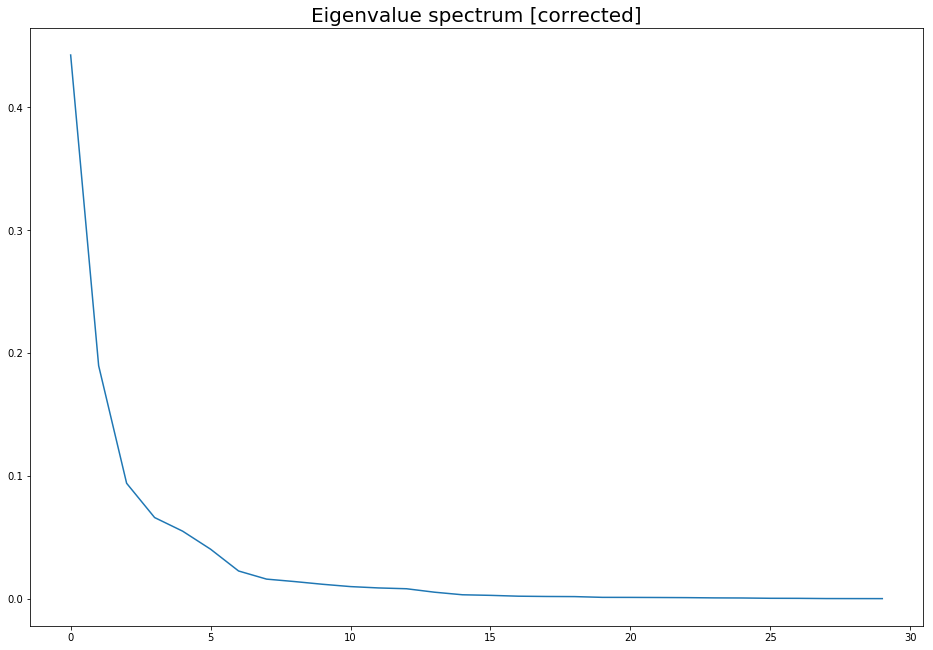

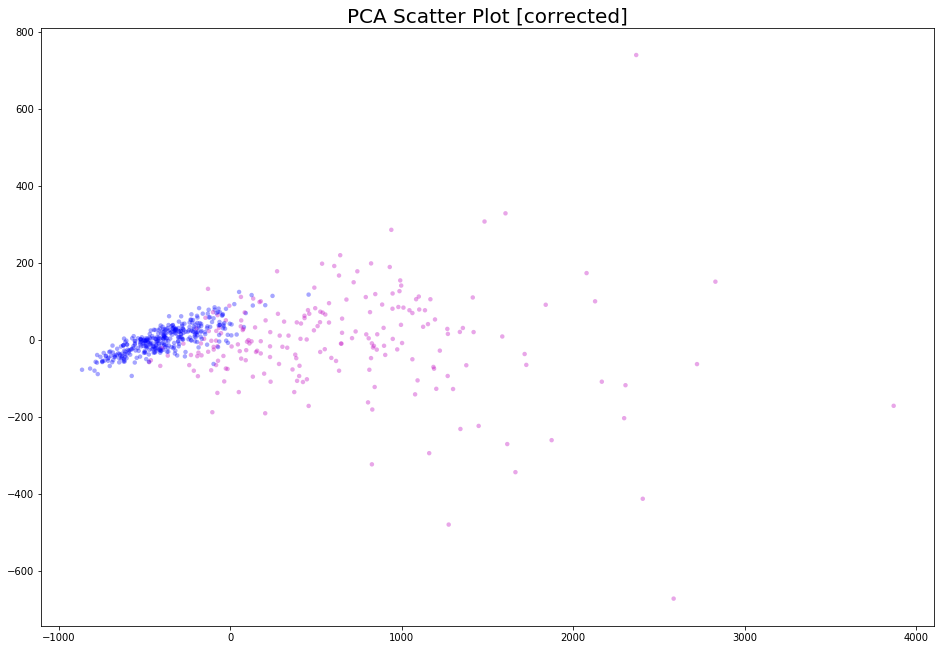

In [53]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data_std)
plt.figure(figsize = (16, 11))
plt.title('Eigenvalue spectrum [corrected]', size=20)
plt.plot(pca.explained_variance_ratio_)
plt.savefig('2')

x = data.values
pca = PCA(n_components = 2)
pca_2d = pca.fit_transform(x)

#Plot the PCA figure
plt.figure(figsize = (16, 11))
plt.scatter(pca_2d[:,0], pca_2d[:,1], c = target, s=20, cmap = 'autumn', edgecolor = 'None', alpha = 0.35)
#plt.colorbar()
plt.title('PCA Scatter Plot [corrected]', size=20)
plt.savefig('1')
plt.show()

In [16]:
target

0      M
1      M
2      M
3      M
4      M
5      M
6      M
7      M
8      M
9      M
10     M
11     M
12     M
13     M
14     M
15     M
16     M
17     M
18     M
19     B
20     B
21     B
22     M
23     M
24     M
25     M
26     M
27     M
28     M
29     M
      ..
539    B
540    B
541    B
542    B
543    B
544    B
545    B
546    B
547    B
548    B
549    B
550    B
551    B
552    B
553    B
554    B
555    B
556    B
557    B
558    B
559    B
560    B
561    B
562    M
563    M
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

# 修改图的尺寸

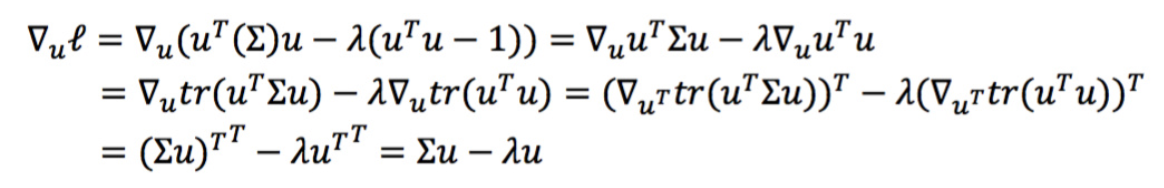

# Clustering

[[ 2.17729736e+03 -5.93809671e+01]
 [-3.19153554e+02 -1.25394223e+00]
 [ 7.89654752e+02  1.37700793e+01]]


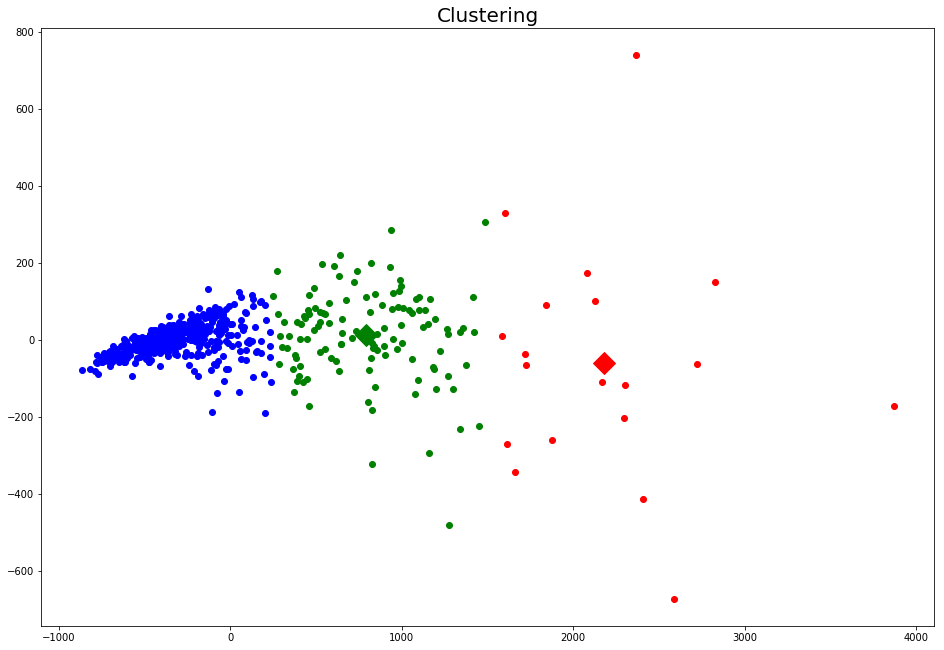

In [17]:
#coding=utf-8
from numpy import *
    
#计算两个向量的距离，用的是欧几里得距离
def distEclud(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2)))

#随机生成初始的质心（ng的课说的初始方式是随机选K个点）    
def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = mat(zeros((k,n)))
    for j in range(n):
        minJ = min(dataSet[:,j])
        rangeJ = float(max(array(dataSet)[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * random.rand(k,1)
    return centroids
    
def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))#create mat to assign data points 
                                      #to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):#for each data point assign it to the closest centroid
            minDist = inf
            minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: 
                clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        for cent in range(k):#recalculate centroids
            ptsInClust = dataSet[nonzero(clusterAssment[:,0].A==cent)[0]]#get all the point in this cluster
            centroids[cent,:] = mean(ptsInClust, axis=0) #assign centroid to mean 
    return centroids, clusterAssment
    
def show(dataSet, k, centroids, clusterAssment):
    from matplotlib import pyplot as plt  
    plt.figure(figsize = (16, 11))
    numSamples, dim = dataSet.shape  
    mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']  
    for i in range(numSamples):  
        markIndex = int(clusterAssment[i, 0])  
        plt.plot(dataSet[i, 0], dataSet[i, 1], mark[markIndex])  
    mark = ['Dr', 'Db', 'Dg', 'Dk', '^b', '+b', 'sb', 'db', '<b', 'pb']  
    for i in range(k):  
        plt.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize = 15)
    plt.title('Clustering', size=20)
    plt.show()
      
def main():
    dataMat = finalData
    myCentroids, clustAssing= kMeans(dataMat,3)
    print (myCentroids)
    show(dataMat, 3, myCentroids, clustAssing)  
    
    
if __name__ == '__main__':
    main()

# SOM

(30, 25)


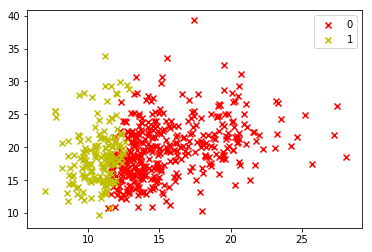

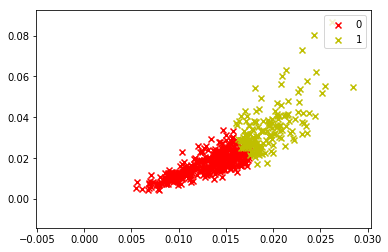

In [18]:
import numpy as np
import pylab as pl

class SOM(object):
    def __init__(self, X, output, iteration, batch_size):
        """
        :param X:  形状是N*D， 输入样本有N个,每个D维
        :param output: (n,m)一个元组，为输出层的形状是一个n*m的二维矩阵
        :param iteration:迭代次数
        :param batch_size:每次迭代时的样本数量
        初始化一个权值矩阵，形状为D*(n*m)，即有n*m权值向量，每个D维
        """
        self.X = X
        self.output = output
        self.iteration = iteration
        self.batch_size = batch_size
        self.W = np.random.rand(X.shape[1], output[0] * output[1])
        print (self.W.shape)

    def GetN(self, t):
        """
        :param t:时间t, 这里用迭代次数来表示时间
        :return: 返回一个整数，表示拓扑距离，时间越大，拓扑邻域越小
        """
        a = min(self.output)
        return int(a-float(a)*t/self.iteration)

    def Geteta(self, t, n):
        """
        :param t: 时间t, 这里用迭代次数来表示时间
        :param n: 拓扑距离
        :return: 返回学习率，
        """
        return np.power(np.e, -n)/(t+2)

    def updata_W(self, X, t, winner):
        N = self.GetN(t)
        for x, i in enumerate(winner):
            to_update = self.getneighbor(i[0], N)
            for j in range(N+1):
                e = self.Geteta(t, j)
                for w in to_update[j]:
                    self.W[:, w] = np.add(self.W[:,w], e*(X[x,:] - self.W[:,w]))

    def getneighbor(self, index, N):
        """
        :param index:获胜神经元的下标
        :param N: 邻域半径
        :return ans: 返回一个集合列表，分别是不同邻域半径内需要更新的神经元坐标
        """
        a, b = self.output
        length = a*b
        def distence(index1, index2):
            i1_a, i1_b = index1 // a, index1 % b
            i2_a, i2_b = index2 // a, index2 % b
            return np.abs(i1_a - i2_a), np.abs(i1_b - i2_b)

        ans = [set() for i in range(N+1)]
        for i in range(length):
            dist_a, dist_b = distence(i, index)
            if dist_a <= N and dist_b <= N: ans[max(dist_a, dist_b)].add(i)
        return ans




    def train(self):
        """
        train_Y:训练样本与形状为batch_size*(n*m)
        winner:一个一维向量，batch_size个获胜神经元的下标
        :return:返回值是调整后的W
        """
        count = 0
        while self.iteration > count:
            train_X = self.X[np.random.choice(self.X.shape[0], self.batch_size)]
            normal_W(self.W)
            normal_X(train_X)
            train_Y = train_X.dot(self.W)
            winner = np.argmax(train_Y, axis=1).tolist()
            self.updata_W(train_X, count, winner)
            count += 1
        return self.W

    def train_result(self):
        normal_X(self.X)
        train_Y = self.X.dot(self.W)
        winner = np.argmax(train_Y, axis=1).tolist()
        #print (winner)
        return winner

def normal_X(X):
    """
    :param X:二维矩阵，N*D，N个D维的数据
    :return: 将X归一化的结果
    """
    N, D = X.shape
    for i in range(N):
        temp = np.sum(np.multiply(X[i], X[i]))
        X[i] /= np.sqrt(temp)
    return X
def normal_W(W):
    """
    :param W:二维矩阵，D*(n*m)，D个n*m维的数据
    :return: 将W归一化的结果
    """
    for i in range(W.shape[1]):
        temp = np.sum(np.multiply(W[:,i], W[:,i]))
        W[:, i] /= np.sqrt(temp)
    return W

#画图
def draw(C):
    colValue = ['r', 'y', 'g', 'b', 'c', 'k', 'm']
    for i in range(len(C)):
        coo_X = []    #x坐标列表
        coo_Y = []    #y坐标列表
        for j in range(len(C[i])):
            coo_X.append(C[i][j][0])
            coo_Y.append(C[i][j][1])
        pl.scatter(coo_X, coo_Y, marker='x', color=colValue[i%len(colValue)], label=i)

    pl.legend(loc='upper right')
    pl.show()

dataset = np.mat(data)
dataset_old = dataset.copy()

som = SOM(dataset, (5, 5), 1, 30)
som.train()
res = som.train_result()
classify = {}
for i, win in enumerate(res):
    if not classify.get(win[0]):
        classify.setdefault(win[0], [i])
    else:
        classify[win[0]].append(i)
C = []#未归一化的数据分类结果
D = []#归一化的数据分类结果
for i in classify.values():
    C.append(dataset_old[i].tolist())
    D.append(dataset[i].tolist())
draw(C)
draw(D)


### Standardisation and Visualisation

In [43]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
pca_2d_std = pca.fit_transform(x_std)

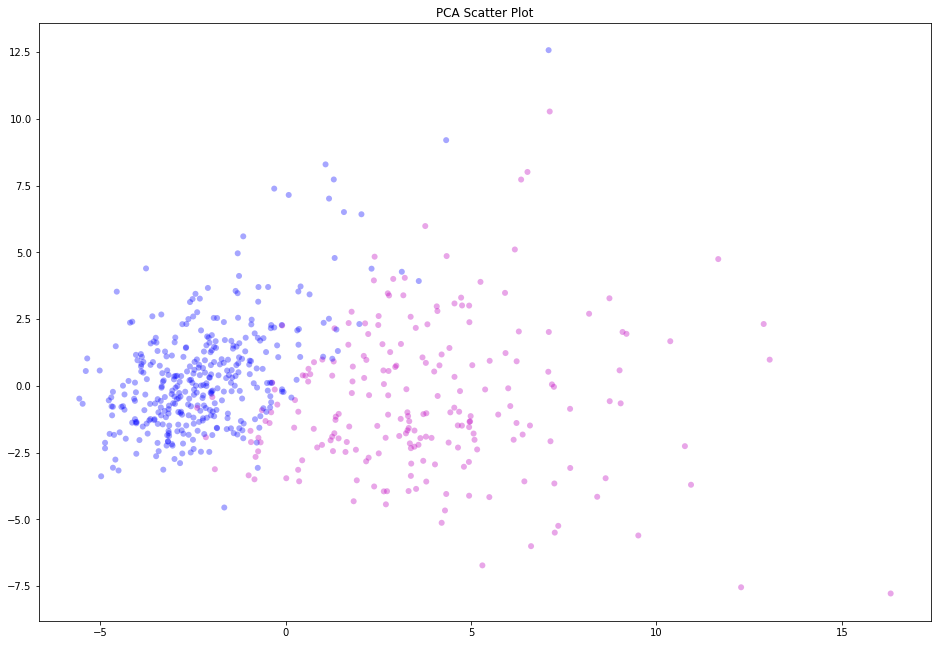

In [44]:
plt.figure(figsize = (16, 11))
plt.scatter(pca_2d_std[:,0], pca_2d_std[:,1], c=target, cmap = "RdYlGn", edgecolor = "None", alpha = 0.35)
plt.title('PCA Scatter Plot')
plt.show()

'''matlab
function [eigvector, eigvalue] = PCA(data, options)
%PCA	Principal Component Analysis
%
%	Usage:
%       [eigvector, eigvalue] = PCA(data, options)
%       [eigvector, eigvalue] = PCA(data)
%
%             Input:
%               data       - Data matrix. Each row vector of fea is a data point.
%
%     options.ReducedDim   - The dimensionality of the reduced subspace. If 0,
%                         all the dimensions will be kept.
%                         Default is 0.
%
%             Output:
%               eigvector - Each column is an embedding function, for a new
%                           data point (row vector) x,  y = x*eigvector
%                           will be the embedding result of x.
%               eigvalue  - The sorted eigvalue of PCA eigen-problem.
%
%	Examples:
% 			fea = rand(7,10);
%           options=[];
%           options.ReducedDim=4;
% 			[eigvector,eigvalue] = PCA(fea,4);
%           Y = fea*eigvector;
%
%   version 3.0 --Dec/2011
%   version 2.2 --Feb/2009
%   version 2.1 --June/2007
%   version 2.0 --May/2007
%   version 1.1 --Feb/2006
%   version 1.0 --April/2004
%
%   Written by Deng Cai (dengcai AT gmail.com)
%

if (~exist('options','var'))
    options = [];
end

ReducedDim = 0;
if isfield(options,'ReducedDim')
    ReducedDim = options.ReducedDim;
end


[nSmp,nFea] = size(data);
if (ReducedDim > nFea) || (ReducedDim <=0)
    ReducedDim = nFea;
end


if issparse(data)
    data = full(data);
end
sampleMean = mean(data,1);
data = (data - repmat(sampleMean,nSmp,1));

[eigvector, eigvalue] = mySVD(data',ReducedDim);
eigvalue = full(diag(eigvalue)).^2;

if isfield(options,'PCARatio')
    sumEig = sum(eigvalue);
    sumEig = sumEig*options.PCARatio;
    sumNow = 0;
    for idx = 1:length(eigvalue)
        sumNow = sumNow + eigvalue(idx);
        if sumNow >= sumEig
            break;
        end
    end
    eigvector = eigvector(:,1:idx);
end
'''

Output layers: [[0.83, 0.52], [0.94, 0.23], [0.67, 0.13], [0.8, 0.16], [0.2, 0.18]]
Inputs normalization: [[0.45, 0.89], [0.6, 0.8], [0.64, 0.77], [0.66, 0.75], [0.55, 0.83]]
Weights normalization: [[0.85, 0.53], [0.97, 0.24], [0.98, 0.19], [0.98, 0.2], [0.74, 0.67]]
Winner index: 4
After Adjust: [0.6000000000000001, 1.09]
Original layers: [[0.49, 0.41], [0.9, 0.2], [0.58, 0.59]]
After train layers: [[0.38370421641827024, 0.3652236177103869], [0.7389331275285403, 0.06607897611640651], [0.19253343168727222, 0.529408816431441]]


No handles with labels found to put in legend.


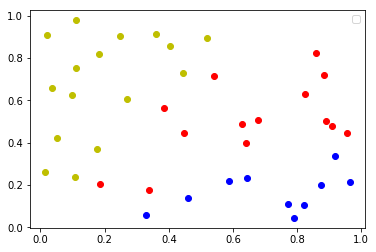

In [22]:
import random
import matplotlib.pyplot as plt

import random
def initOutputLayer(m, n):  # m为竞争层节点数目；n为每一个节点的维度
    layers = []
    random.seed()
    for i in range(m):
        unit = []  # 每一个节点
        for j in range(n):
            unit.append(round(random.random(),2))
        layers.append(unit)
    return layers

m = 5
n = 2
layers = initOutputLayer(m, n)
print("Output layers:", layers)

import numpy.linalg as LA  # 计算范数
import math

def normalization(v):  # v为向量
    norm = LA.norm(v, 2)  # 计算2范数
    v_new = []
    for i in range(len(v)):
        v_new.append(round(v[i]/norm,2))  # 保留2位小数
    return v_new

def normalizationVList(X):  
    X_new = []
    for x in X:
        X_new.append(normalization(x))
    return X_new

def calSimilarity(x, y):  # 计算x,y两个向量的相似度
    if len(x)!=len(y):
        raise "维度不一致！"
    c = 0
    for i in range(len(x)):
        c += pow((x[i] - y[i]), 2)
    return  math.sqrt(c)

def getWinner(x, layers):  # 找到layers里面与x最相似的节点
    # x = normalization(x)
    # layers = normalizationVList(layers)
    min_value = 100000  # 存储最短距离
    min_index = -1  # 存储跟x最相似节点的竞争层节点index
    for i in range(len(layers)):
        v = calSimilarity(x, layers[i])
        if v < min_value:
            min_value = v
            min_index = i
    return min_index  # 返回获胜节点index
    
# 输入数据处理
X = [[1, 2], [3, 4], [5, 6], [7, 8], [2, 3]]  # 输入列表
X_norm = normalizationVList(X)
print("Inputs normalization:", X_norm)  # 输入数据归一化
# 权值处理
layers_norm = normalizationVList(layers)
print("Weights normalization:", layers_norm)  # 权值归一化
# 计算某一个x输入的竞争层胜利节点
winner_index = getWinner(X_norm[0], layers_norm)
print("Winner index:", winner_index)

def adjustWeight(w, x, alpha):  # w为要调整的权值向量；x为输入向量；alpha为学习率
    if len(w)!=len(x):
        raise "w,x维度应该相等！"
    w_new = []
    for i in range(len(w)):
        w_new.append(w[i] + alpha*(x[i] - w[i]))
    return w_new

alpha = 0.5  # 学习参数
print("After Adjust:", adjustWeight(layers[winner_index], X[0], alpha))


def createData(num, dim):  # 数据组数与数据维度
    data = []
    for i in range(num):
        pair = []
        for j in range(dim):
            pair.append(random.random())
        data.append(pair)
    return data

# 参数设置
train_times = 10  # 训练次数
data_dim = 2 # 数据维度
train_num = 160
test_num = 40
learn_rate = 0.5  # 学习参数

# 生成数据
random.seed()
# 生成训练数据
train_X = createData(train_num, data_dim)
# 生成测试数据
test_X = createData(test_num, data_dim)
# print(test_X)

# 初始化m个类
m = 3  # m个类别
layers = initOutputLayer(m, data_dim)
print("Original layers:", layers)

# 开始迭代训练
while train_times > 0:
    for i in range(train_num):
        # 权值归一化
        layers_norm = normalizationVList(layers)
        # 计算某一个x输入的竞争层胜利节点
        winner_index = getWinner(train_X[i], layers_norm)
        # 修正权值
        layers[winner_index] = adjustWeight(layers[winner_index], train_X[i], learn_rate)
    train_times -= 1
print("After train layers:", layers)

# 测试
for i in range(test_num):
    # 权值归一化
    layers_norm = normalizationVList(layers)
    # 计算某一个x输入的竞争层胜利节点
    winner_index = getWinner(test_X[i], layers_norm)
    # 画图
    color = "ro"
    if winner_index == 0:
        color = "ro"
    elif winner_index == 1:
        color = "bo"
    elif winner_index == 2:
        color = "yo"
    plt.plot(test_X[i][0], test_X[i][1], color)
plt.legend()
plt.show()

(30, 25)
[[1], [1], [1], [1], [5], [1], [1], [1], [1], [1], [1], [1], [5], [5], [6], [1], [1], [1], [1], [5], [6], [6], [5], [1], [1], [1], [5], [5], [1], [5], [1], [1], [1], [1], [1], [1], [5], [6], [5], [5], [5], [6], [1], [1], [5], [1], [6], [1], [5], [5], [6], [6], [6], [5], [1], [6], [1], [1], [5], [6], [6], [6], [1], [6], [1], [5], [6], [6], [6], [6], [1], [6], [1], [5], [5], [1], [6], [1], [5], [6], [6], [6], [5], [5], [6], [1], [5], [1], [6], [5], [5], [5], [1], [5], [1], [1], [6], [6], [6], [5], [1], [6], [6], [6], [6], [1], [6], [6], [1], [6], [6], [6], [6], [6], [6], [5], [6], [1], [1], [5], [6], [1], [5], [5], [6], [5], [1], [5], [5], [5], [6], [1], [1], [5], [1], [5], [5], [6], [1], [6], [6], [1], [6], [6], [6], [6], [5], [5], [5], [5], [5], [6], [5], [6], [5], [6], [5], [5], [6], [6], [5], [5], [1], [6], [1], [6], [6], [1], [1], [5], [6], [1], [1], [6], [6], [6], [6], [5], [6], [6], [1], [1], [1], [6], [5], [6], [5], [6], [6], [6], [5], [5], [6], [1], [6], [6], [5], [5], 

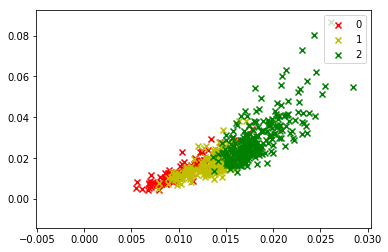

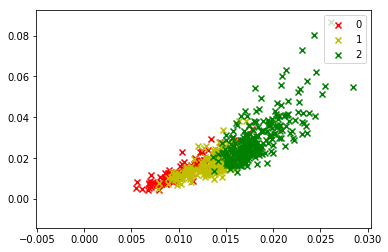

In [23]:
import numpy as np
import pylab as pl
 
class SOM(object):
  def __init__(self, X, output, iteration, batch_size):
    """
    :param X: 形状是N*D， 输入样本有N个,每个D维
    :param output: (n,m)一个元组，为输出层的形状是一个n*m的二维矩阵
    :param iteration:迭代次数
    :param batch_size:每次迭代时的样本数量
    初始化一个权值矩阵，形状为D*(n*m)，即有n*m权值向量，每个D维
    """
    self.X = X
    self.output = output
    self.iteration = iteration
    self.batch_size = batch_size
    self.W = np.random.rand(X.shape[1], output[0] * output[1])
    print (self.W.shape)
 
  def GetN(self, t):
    """
    :param t:时间t, 这里用迭代次数来表示时间
    :return: 返回一个整数，表示拓扑距离，时间越大，拓扑邻域越小
    """
    a = min(self.output)
    return int(a-float(a)*t/self.iteration)
 
  def Geteta(self, t, n):
    """
    :param t: 时间t, 这里用迭代次数来表示时间
    :param n: 拓扑距离
    :return: 返回学习率，
    """
    return np.power(np.e, -n)/(t+2)
 
  def updata_W(self, X, t, winner):
    N = self.GetN(t)
    for x, i in enumerate(winner):
      to_update = self.getneighbor(i[0], N)
      for j in range(N+1):
        e = self.Geteta(t, j)
        for w in to_update[j]:
          self.W[:, w] = np.add(self.W[:,w], e*(X[x,:] - self.W[:,w]))
 
  def getneighbor(self, index, N):
    """
    :param index:获胜神经元的下标
    :param N: 邻域半径
    :return ans: 返回一个集合列表，分别是不同邻域半径内需要更新的神经元坐标
    """
    a, b = self.output
    length = a*b
    def distence(index1, index2):
      i1_a, i1_b = index1 // a, index1 % b
      i2_a, i2_b = index2 // a, index2 % b
      return np.abs(i1_a - i2_a), np.abs(i1_b - i2_b)
 
    ans = [set() for i in range(N+1)]
    for i in range(length):
      dist_a, dist_b = distence(i, index)
      if dist_a <= N and dist_b <= N: ans[max(dist_a, dist_b)].add(i)
    return ans
 
 
 
  def train(self):
    """
    train_Y:训练样本与形状为batch_size*(n*m)
    winner:一个一维向量，batch_size个获胜神经元的下标
    :return:返回值是调整后的W
    """
    count = 0
    while self.iteration > count:
      train_X = self.X[np.random.choice(self.X.shape[0], self.batch_size)]
      normal_W(self.W)
      normal_X(train_X)
      train_Y = train_X.dot(self.W)
      winner = np.argmax(train_Y, axis=1).tolist()
      self.updata_W(train_X, count, winner)
      count += 1
    return self.W
 
  def train_result(self):
    normal_X(self.X)
    train_Y = self.X.dot(self.W)
    winner = np.argmax(train_Y, axis=1).tolist()
    print (winner)
    return winner
 
def normal_X(X):
  """
  :param X:二维矩阵，N*D，N个D维的数据
  :return: 将X归一化的结果
  """
  N, D = X.shape
  for i in range(N):
    temp = np.sum(np.multiply(X[i], X[i]))
    X[i] /= np.sqrt(temp)
  return X
def normal_W(W):
  """
  :param W:二维矩阵，D*(n*m)，D个n*m维的数据
  :return: 将W归一化的结果
  """
  for i in range(W.shape[1]):
    temp = np.sum(np.multiply(W[:,i], W[:,i]))
    W[:, i] /= np.sqrt(temp)
  return W
 
#画图
def draw(C):
  colValue = ['r', 'y', 'g', 'b', 'c', 'k', 'm']
  for i in range(len(C)):
    coo_X = []  #x坐标列表
    coo_Y = []  #y坐标列表
    for j in range(len(C[i])):
      coo_X.append(C[i][j][0])
      coo_Y.append(C[i][j][1])
    pl.scatter(coo_X, coo_Y, marker='x', color=colValue[i%len(colValue)], label=i)
 
  pl.legend(loc='upper right')
  pl.show()
 
#数据集：每三个是一组分别是西瓜的编号，密度，含糖量

 

dataset = data_test
dataset_old = dataset.copy()
 
som = SOM(dataset, (5, 5), 1, 30)
som.train()
res = som.train_result()
classify = {}
for i, win in enumerate(res):
  if not classify.get(win[0]):
    classify.setdefault(win[0], [i])
  else:
    classify[win[0]].append(i)
C = []#未归一化的数据分类结果
D = []#归一化的数据分类结果
for i in classify.values():
  C.append(dataset_old[i].tolist())
  D.append(dataset[i].tolist())
draw(C)
draw(D)